In [1]:
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def generateNumberOfBread():
    n = random.randint(1,100)
    if n <= 50 :
        return 1
    if n <= 65:
        return 2
    if n <= 75:
        return 3
    return 4

def generateNumberOfPeople():
    n = random.randint(1,100)
    if n <= 20 :
        return 14
    if n <= 48:
        return 16
    if n <= 78:
        return 18
    return 20

def simulate(number_of_day):
    res = []
    for i in range(number_of_day):
        daily = []
        people = generateNumberOfPeople()
        for j in range (people):
            daily.append(generateNumberOfBread())
        res.append({"number of people":people,"daily report":daily,"number of bread sold":sum(daily)})
    return res

def simulateResult(number_of_day):
    res = simulate(number_of_day)
    res2= []
    for i in res:
        res2.append(i["number of bread sold"])
    v = np.std(res2)
    e = np.mean(res2)
    return {"number of day":number_of_day,"mean":e,"standard deviation":v}




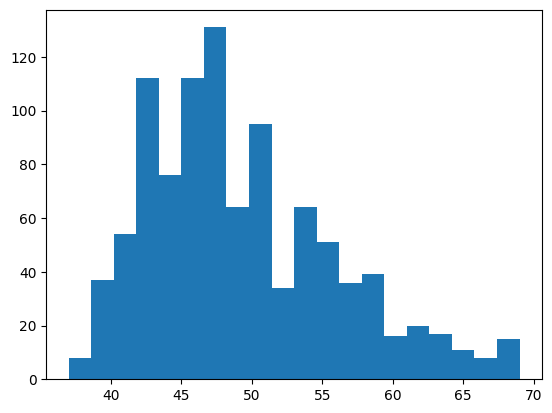

In [56]:
def simulateMoneyPerDay(number_of_bread_per_day,breadPrice,pokhtPrice):
    daily = []
    money = number_of_bread_per_day * -pokhtPrice
    people = generateNumberOfPeople()
    for j in range (people):
        daily.append(generateNumberOfBread())
    n = sum(daily)
    if number_of_bread_per_day <= n :
        money += breadPrice * number_of_bread_per_day
    else:
        money += breadPrice * n
        money += (number_of_bread_per_day-n) * breadPrice / 2
    return int(money)

def simulateMoney(number_of_day,number_of_bread_per_day):
    res = []
    for i in range(number_of_day):
        res.append({"Money per day":simulateMoneyPerDay(number_of_bread_per_day,2800,1600)})
    return res

def simulateMoneyAtAll(number_of_day,number_of_bread_per_day):
    s = 0
    for i in simulateMoney(number_of_day,number_of_bread_per_day):
        s += i["Money per day"]
    return s/number_of_day


def find_answer(number_of_day): ## az 0 ta 70 noon
    best_ans=0
    bestMoney = 0
    for ans in range(70):
        money = simulateMoneyAtAll(number_of_day,ans)
        if money > bestMoney:
            bestMoney = money
            best_ans = ans
    return best_ans
       
res = []
for i in range(1000):
    res.append(find_answer(10))

plt.hist(res,bins=20)
plt.show()